In [1]:
import pandas as pd

# Weir in ICM

In [2]:
def read_excel(excel_path, tab_name):
    df = pd.read_excel(excel_path, tab_name)
    df.index = pd.to_datetime(df['Unnamed: 0'])
    return df

In [3]:
def weir_flow_with_g(d, b, cd, g):
    """
    https://help.autodesk.com/view/IWICMS/2024/ENU/?guid=GUID-6A47B0A6-D57A-4FF7-AFBC-C0433A9151C4
    eq 1
    q = cd*g^0.5*b*d^1.5

    g=9.8 m/s^2: q: m^3/s
    g=32.2 ft/s^2: q: ft^3/s
    """
    return cd*g**0.5*b*d**1.5



def weir_flow_without_g(d, b, c):
    """
    q = c*b*d^1.5
    """
    return 1.5*c*b*d**1.5

# test 1
# 

In [4]:
excel_path = './data.xlsx'
tab_name = 'cfs'
df = read_excel(excel_path, tab_name)

In [5]:
c = 0.85
b = 10 #ft

df['weir_flow_without_g'] = df.apply(lambda x: weir_flow_without_g(x['US depth (ft)'], b, c), axis=1)
df['weir_flow_with_g'] = df.apply(lambda x: weir_flow_with_g(x['US depth (ft)'], b, c, 32.2), axis=1)

Text(0.5, 1.0, 'Weir flow Cd=0.85, B=10ft, Q=Cd*g^0.5*d^1.5')

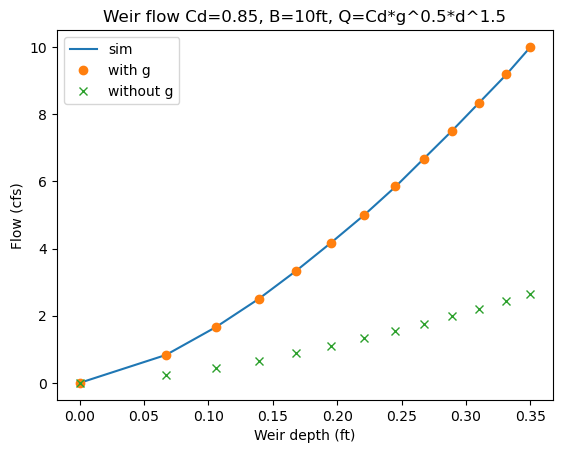

In [6]:
ax = df.plot(x='US depth (ft)', y='US flow (ft3/s)', label='sim')
df.plot(x='US depth (ft)', y='weir_flow_with_g', label='with g', ax=ax, style='o')
df.plot(x='US depth (ft)', y='weir_flow_without_g', label='without g', ax=ax, style='x')
ax.set_ylabel('Flow (cfs)')
ax.set_xlabel('Weir depth (ft)')
ax.legend()
ax.set_title('Weir flow Cd=0.85, B=10ft, Q=Cd*g^0.5*d^1.5')

## Metric

Cd is the same as 0.85

Text(0.5, 1.0, 'Weir flow Cd=0.85, B=3.048m, Q=Cd*g^0.5*d^1.5')

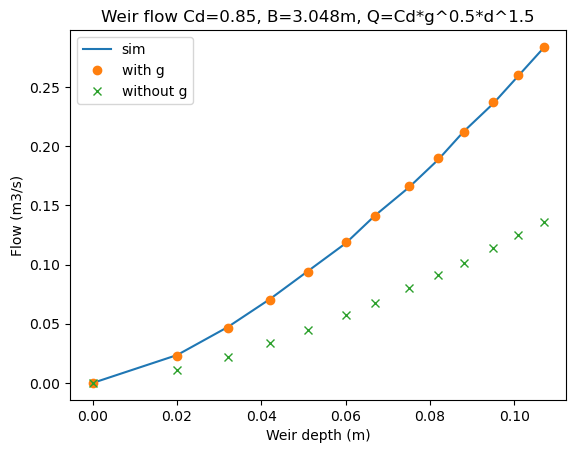

In [7]:
excel_path = './data.xlsx'
tab_name = 'metric'
df = read_excel(excel_path, tab_name)

c = 0.85
b = 3.048 #m
g = 9.8 #m/s2

df['weir_flow_without_g'] = df.apply(lambda x: weir_flow_without_g(x['US depth (m)'], b, c), axis=1)
df['weir_flow_with_g'] = df.apply(lambda x: weir_flow_with_g(x['US depth (m)'], b, c, g), axis=1)

ax = df.plot(x='US depth (m)', y='US flow (m3/s)', label='sim')
df.plot(x='US depth (m)', y='weir_flow_with_g', label='with g', ax=ax, style='o')
df.plot(x='US depth (m)', y='weir_flow_without_g', label='without g', ax=ax, style='x')
ax.set_ylabel('Flow (m3/s)')
ax.set_xlabel('Weir depth (m)')
ax.legend()
ax.set_title('Weir flow Cd=0.85, B=3.048m, Q=Cd*g^0.5*d^1.5')

## mgd units

Text(0.5, 1.0, 'Weir flow Cd=0.85, B=10ft, Q=Cd*g^0.5*d^1.5')

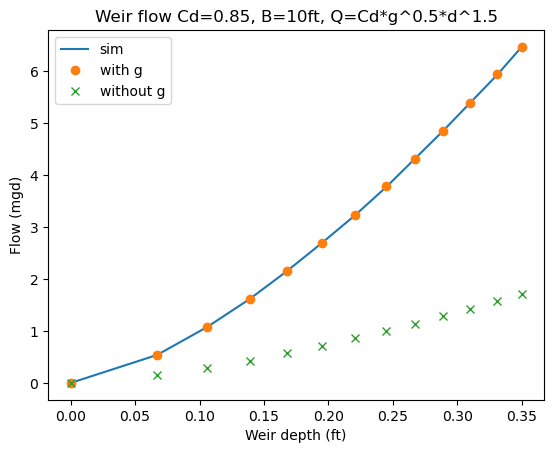

In [10]:
excel_path = './data.xlsx'
tab_name = 'mgd'
df = read_excel(excel_path, tab_name)

c = 0.85
b = 10 #ft
g = 32.2 #m/s2

df['weir_flow_without_g'] = df.apply(lambda x: 0.6463*weir_flow_without_g(x['US depth (ft)'], b, c), axis=1)
df['weir_flow_with_g'] = df.apply(lambda x: 0.6463*weir_flow_with_g(x['US depth (ft)'], b, c, g), axis=1)

ax = df.plot(x='US depth (ft)', y='US flow (MGD)', label='sim')
df.plot(x='US depth (ft)', y='weir_flow_with_g', label='with g', ax=ax, style='o')
df.plot(x='US depth (ft)', y='weir_flow_without_g', label='without g', ax=ax, style='x')
ax.set_ylabel('Flow (mgd)')
ax.set_xlabel('Weir depth (ft)')
ax.legend()
ax.set_title('Weir flow Cd=0.85, B=10ft, Q=Cd*g^0.5*d^1.5')